# <img src="https://m.media-amazon.com/images/W/MEDIAX_792452-T2/images/I/81vOF2Rr2tS.jpg" width="60" />  
# **Prediction of Close Cotation in the case of bitcoin Bitcoin** 



# ***Introduction***

<font size= "4" >

This project aims to estimate the closing price of cryptocurrencies using predictive models. Predicting time series in the cryptocurrency market is a challenging task due to its high volatility and sensitivity to social media and influential announcements. In this project, we take a highly technical approach and use the following models : Linear regression, support vector regression, Long-Short Mermory and the ARIMA model. 

Before we start, we don't claim to have exceptional results, especially when it comes to making recursive stock price predictions. In fact, all we're doing is applying our models to a specific case and seeing how these models behave when faced with a set of data that's difficult to predict. So the subject of this data science project is How can predictive models be used to estimate crypto-currency closing prices ? 

All the analyses and predictions in this notebook are made for Bitcoin, but are applicable to all other cryptocurrencies.



The plan of the project presented in this notebook is structured as follows :

I. ***Data extarction and Data Visualization***

- In this section, we download the database with the Twelve DATA API, enabling 800 requests per day. For reproducibility of the project, the code can be run many times. Then we visualize the data with the candles

II. ***Enrich data by adding variables and prepare the data for modeling***

- To enrich the data set we add avriables, which are well-known financial indicators such as RSI, ATR and EMA.
- To apply machine learning models, we need to scale the data so that it is comparable, especially for highly volatile data that may have outliers. 

III. ***The use of predictive models***

- In this section, we use classical machine learning pedictive models such as linear regression and support vector machine.
- We also use a deep learning model Long short-term memory for recursive prediction which we will make available in a Dashbord
- Finally, we will use a time series model to conduct a descriptive study and test the hypotheses.

IV. ***A dashboard to provide predictions***

- To create the application, we use Streamlit. The application takes past data and provides a prediction for a specific hour or day using LSTM.





</font>



# I. ***Data extarction and Data Visualization*** :
### In this part we load the data and we verifie if it's clean, we visualize the data before adding some features 


In [102]:
from crypto_module import *

<font size="4">

- Use the API

</font>

In [105]:
symbol = 'BTC/USD'
interval = '1day' # In the first part, we project the daily price . 
start_date = '2022-01-01 00:00:00' # we take 2022 to be sure of data availability 
end_date = '2022-12-31 00:00:00'

<font size="4">


- The function  $\, \texttt{load\_data}\, $  allows an API call, which in our case is for Bitcoin.
- The function transform the type of the element of the DataFrame to ***float***

</font>

In [60]:
data = load_data(symbol, start_date, end_date, interval)
data

,datetime,open,high,low,close
0,2022-01-01,46211.19922,47963.28906,46211.19922,47735.12891
1,2022-01-02,47730.00000,47966.16016,46695.33984,47305.01172
2,2022-01-03,47304.21875,47578.96094,45716.50000,46439.19141
3,2022-01-04,46459.57031,47517.35156,45550.98828,45815.32812
4,2022-01-05,45811.16016,47054.82812,42500.00000,43437.66016
...,...,...,...,...,...
360,2022-12-27,16917.19922,16963.83984,16603.13086,16697.98047
361,2022-12-28,16697.98047,16773.65039,16467.39062,16538.40039
362,2022-12-29,16538.07031,16653.00000,16482.10938,16631.19922
363,2022-12-30,16631.19922,16637.72070,16352.41992,16602.00977


<font size="4">


- We can verifie if the Data Set is clean

</font>

In [61]:
# Checking for any missing (NaN) values in the dataset.
data.isna().sum()

datetime    0
open        0
high        0
low         0
close       0
dtype: int64

<font size="4">


- There are no Nan Values. So, we can verifie if the type of element of the close colone is ***float*** to plot it properly.

</font>

In [62]:
# Extracting the 'close' column from the data DataFrame.
data['close']

0      47735.12891
1      47305.01172
2      46439.19141
3      45815.32812
4      43437.66016
          ...     
360    16697.98047
361    16538.40039
362    16631.19922
363    16602.00977
364    16528.02930
Name: close, Length: 365, dtype: float64

<font size="4">

- dtype is a ***float*** we can plot

</font>

### ***We can visualize the Data***
<font size="4">

- We can code two functions for visualizing the Close price and the candels which represent the outcome of the market on the considered interval

</font>

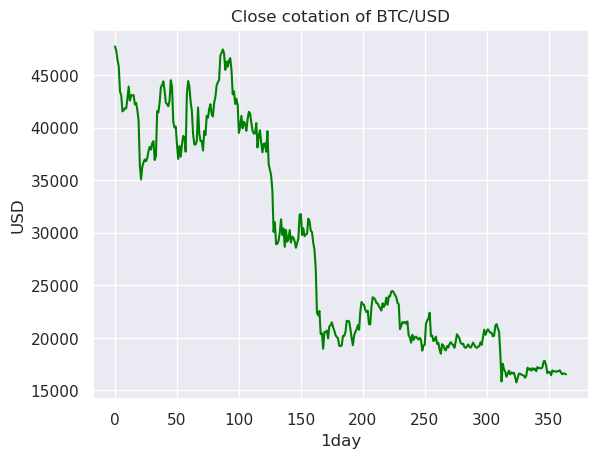

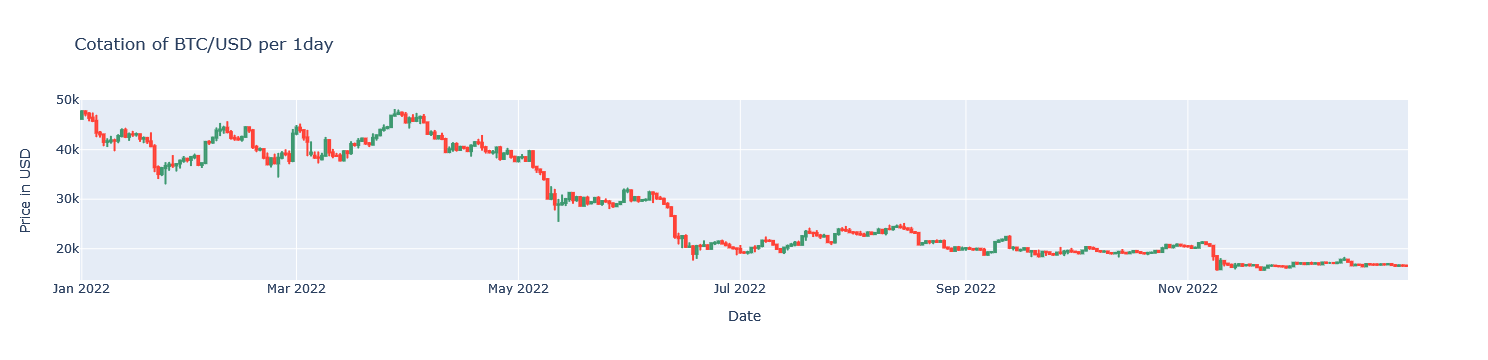

In [63]:
visualize_data(data, symbol, interval)
finance_visualize(data, symbol, interval)

<font size="4"> **_Describe_** : The two graphs show that Bitcoin is highly volatile, with two drops and spikes exceeding $45,000. 

</font>

# II. ***Enrich data by adding variables and prepare the data for modeling***

### The Next step is to enrich the Database by adding indicators
<font size="4"> 
    
- Indicators used are The Relative Strength Index (RSI), The Exponential Moving Average (EMA) and The Average True Range (ATR) 
    - The RSI measures the speed and change of price movements (momentum)
    - The EMA is a movig average that gives more weight to recent price, it seems to be relevent for predicting (trend)
    - The ATR quantifies the volatility (volaltility)

- Those indicators are computed over the 14 last days
</font>
  

<font size="4">

- The function $\texttt{add\_indicators}$ allows us to add the three indicators

</font>

In [64]:
# Using the 'add_indicators' function to add technical indicators to the data.
final_data = add_indicators(data)
final_data

,datetime,open,high,low,close,RSI,EMA,ATR
0,2022-01-14,42581.64844,43462.78906,41766.66016,43090.78125,35.568008,43772.612563,2049.218750
1,2022-01-15,43089.08984,43809.28125,42579.42969,43087.21094,35.548190,43681.225680,1990.692522
2,2022-01-16,43098.19922,43492.07812,42610.44922,43099.76172,35.683860,43603.697152,1911.473692
3,2022-01-17,43104.35156,43199.91016,41568.76172,42216.80078,30.775756,43418.777635,1891.450460
4,2022-01-18,42218.01172,42682.64844,41288.87891,42369.82031,32.508293,43278.916659,1855.901822
...,...,...,...,...,...,...,...,...
347,2022-12-27,16917.19922,16963.83984,16603.13086,16697.98047,44.769321,16866.858029,369.682940
348,2022-12-28,16697.98047,16773.65039,16467.39062,16538.40039,42.154285,16823.063677,365.152714
349,2022-12-29,16538.07031,16653.00000,16482.10938,16631.19922,44.195619,16797.481750,351.276850
350,2022-12-30,16631.19922,16637.72070,16352.41992,16602.00977,43.673548,16771.418819,346.564273


#### ***EMA Indicator*** : 

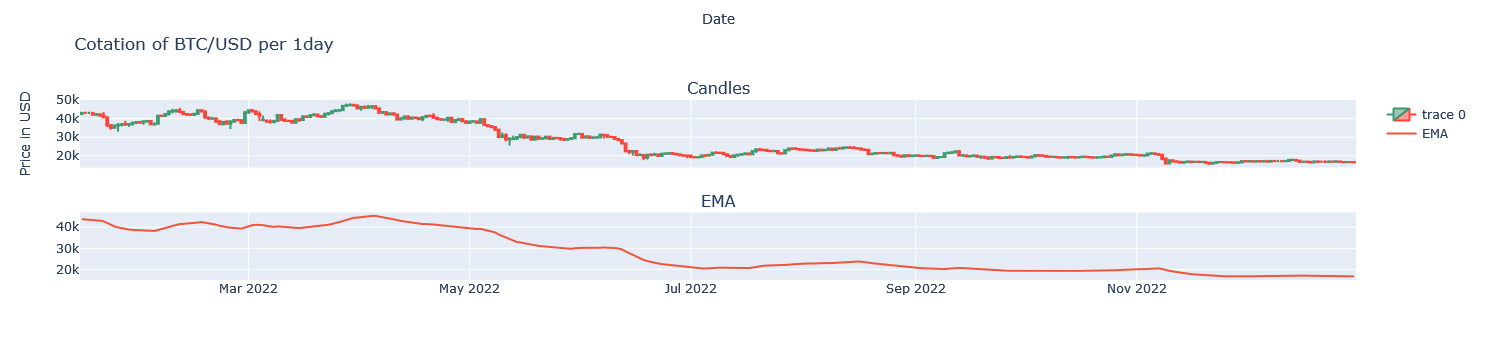

In [65]:
indicator = 'EMA'
visualize_with_indicator(final_data, symbol, interval, indicator)

#### ***RSI Indicator*** :

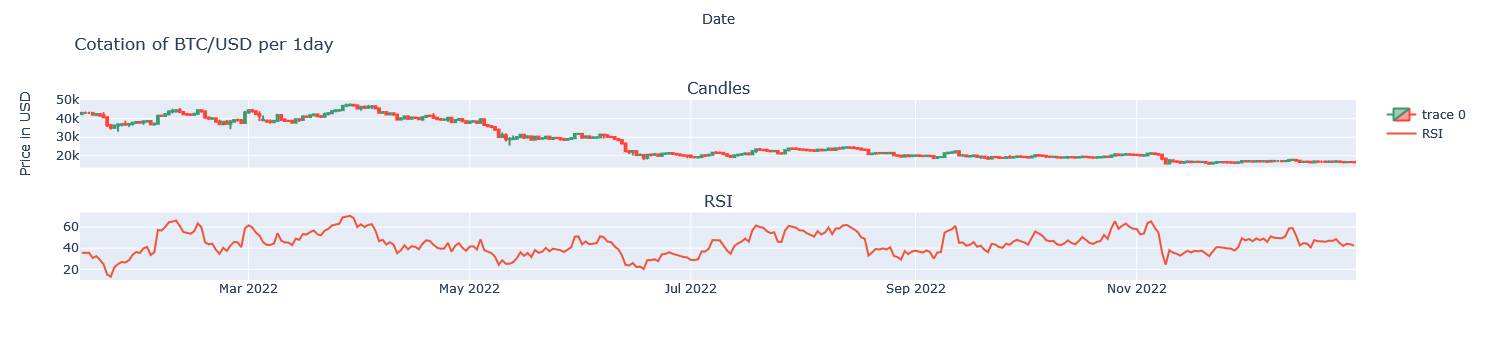

In [66]:
indicator = 'RSI'
visualize_with_indicator(final_data, symbol, interval, indicator)

#### ***ATR Indicator*** : 

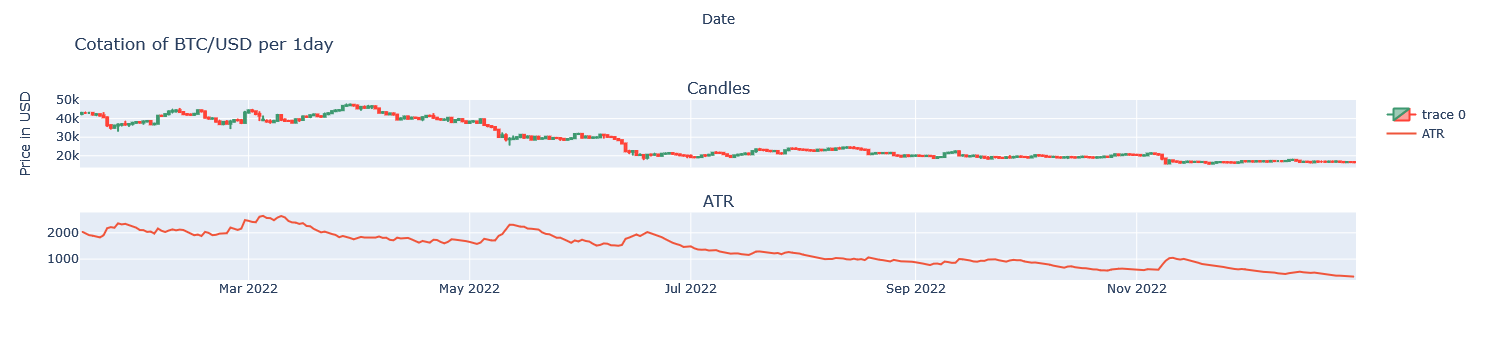

In [67]:
indicator = 'ATR'
visualize_with_indicator(final_data, symbol, interval, indicator)

## Before modeling we have to scale the data for the models we use the min-max scaler 


In [68]:
# Scaling the final_data for better performance in machine learning models.
scaled_data = scaling_data(final_data)
scaled_data

,datetime,open,high,low,close,RSI,EMA,ATR
0,2022-01-14,0.827927,0.854865,0.803011,0.843492,0.390664,0.945616,0.742401
1,2022-01-15,0.843441,0.865458,0.827859,0.843383,0.390319,0.942433,0.717078
2,2022-01-16,0.843719,0.855761,0.828808,0.843767,0.392680,0.939733,0.682802
3,2022-01-17,0.843907,0.846829,0.796961,0.816773,0.307264,0.933293,0.674138
4,2022-01-18,0.816810,0.831015,0.788405,0.821451,0.337416,0.928423,0.658757
...,...,...,...,...,...,...,...,...
347,2022-12-27,0.043316,0.044742,0.033714,0.036614,0.550794,0.008590,0.015697
348,2022-12-28,0.036614,0.038928,0.029565,0.031735,0.505285,0.007065,0.013737
349,2022-12-29,0.031725,0.035239,0.030015,0.034573,0.540810,0.006174,0.007733
350,2022-12-30,0.034573,0.034772,0.026050,0.033680,0.531725,0.005266,0.005694


# III. ***Modelisation to make prediction of the closing stock price***

# III.I ***Linear Regression***
<font size="4">
    
- We use linear regression to predict the the considered prediction time, in the following example we predict the price 60 days later 
</font>

In [69]:
# Setting up parameters for a prediction model. Here, the goal is to predict the closing price 60 days in the future using the closing price as the regressor.
prediction_time = 60 # We want to predict the close price 60 days Later 
regressor = ['close'] # We choose One regressor which is the colse price itself
price, target  = data_preprocess(scaled_data, regressor, prediction_time) # Data Processing for the model

<font size="4">

- We apply the simple linear regression and we obtain the following prediction

</font>

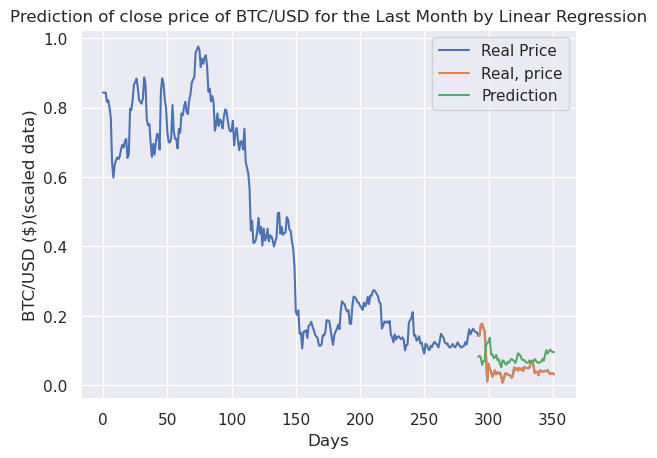

In [70]:
# Applying linear regression to the preprocessed data.
regression_matrix, future_price, simple_r2 = apply_linear_regression(scaled_data, prediction_time, price, target, regressor)
# Visualizing the model's performance.
visualize_model(regression_matrix, scaled_data)

- We can zoom the see the prediction better 

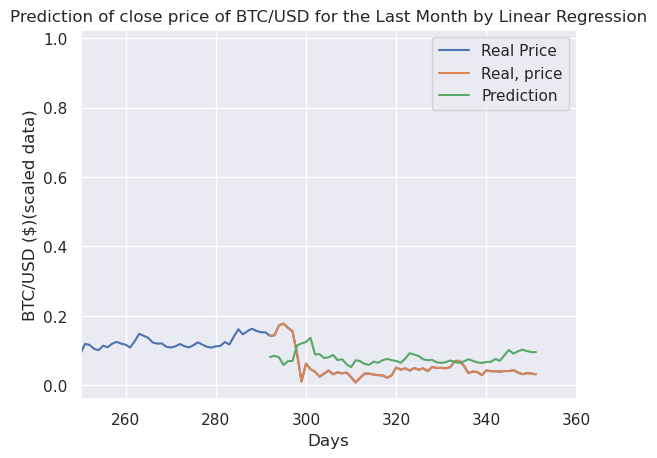

In [71]:
visualize_model(regression_matrix, scaled_data, zoom = [250, 360])

<font size="4">

- We have compute the $R^{2}$ indicator to judge the relevance of the model

</font>

In [72]:
# Displaying the R-squared value of the linear regression model.
simple_r2

0.43749916677520106

<font size="4">

***conclusion*** : 

- The $R^{2}$ shows that the linear regression is not that much adapted for time series like the close price 
- We can see in the plot that the simple linear regression cannot predict abrupt movement of the price, which is expected

</font>

#### We can visualize the prediction of the next 60 days, which correspond to the first two months of 2023

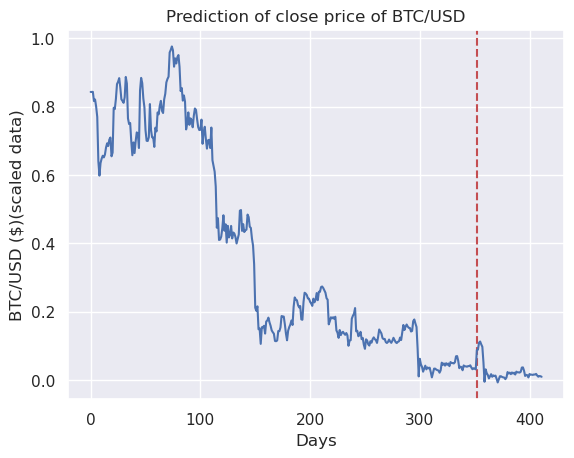

In [73]:
# Visualizing future price predictions made by the model.
visualize_future(scaled_data, future_price)

<font size="4">


***Describe*** : As we performed a simple linear regression to predict, here the following 60 days are almost constant with fluctuations around a certain value close to 0 

-  To verify, we can display the first few months of 2023. 

</font>

In [119]:
compare_data = load_data(symbol, start_date, "2023-03-31", interval) # From the beginning of 2022 until March 2023
c_final_data = add_indicators(compare_data)
c_scaled_data = scaling_data(c_final_data) # final date we will use 

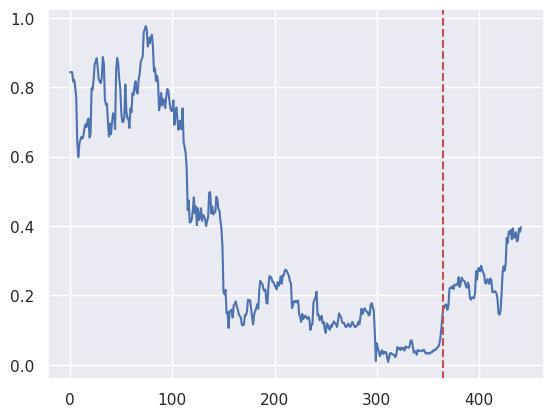

In [121]:
plt.plot(c_scaled_data['close'])
plt.axvline(x = data['close'].shape[0], color = 'r', linestyle = '--', label = 'Prediction')
plt.show()

<font size="4">

***Conclusion*** : It is evident that the realized values are much more volatile than what the model predicted. Additionally, the price does not fluctuate around an average value but it exhibits an upward trend in this example.  

</font>


#### ***We can also try the multiple linear regression***
#### First of all, we analyse de Correlation Matrix to see the correlation between variables

<function matplotlib.pyplot.show(close=None, block=None)>

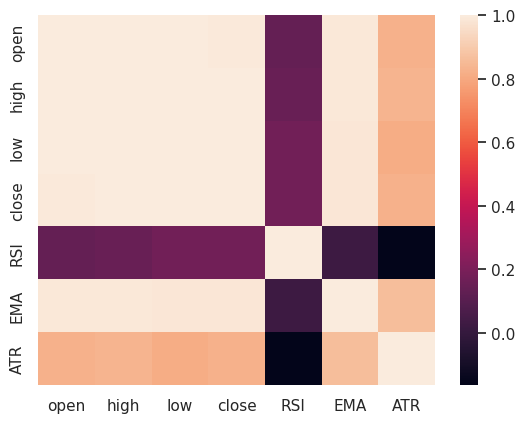

In [74]:
# Creating a correlation matrix from the final_data.
corr_matrix = final_data.drop('datetime', axis=1).corr()
# A heatmap is then plotted using seaborn to visually represent the correlations.
sns.heatmap(corr_matrix)
plt.show


- We can check the values to have antother point of view 

In [75]:
# Extracting the correlation values of all features with respect to the 'close' column from the correlation matrix.
corr_matrix['close']

open     0.994927
high     0.997539
low      0.997530
close    1.000000
RSI      0.173826
EMA      0.985783
ATR      0.825791
Name: close, dtype: float64

<font size="4">


- It seems that the Close Price is relativelly high correlated with the EMA and ATR indicators, we can add them to the Regressos

</font>

#### ***Apply multiple Linear Rgression***

In [76]:
# Updating the list of regressors to include 'close', 'ATR', and 'EMA' for the data preprocessing step.
regressor = ['close', 'ATR', 'EMA']
price, target  = data_preprocess(scaled_data, regressor, prediction_time) # Data Processing for the model

In [77]:
# Applying linear regression with the updated set of regressors.
regression_matrix, future_price, mult_r2 = apply_linear_regression(scaled_data, prediction_time, price, target, regressor)

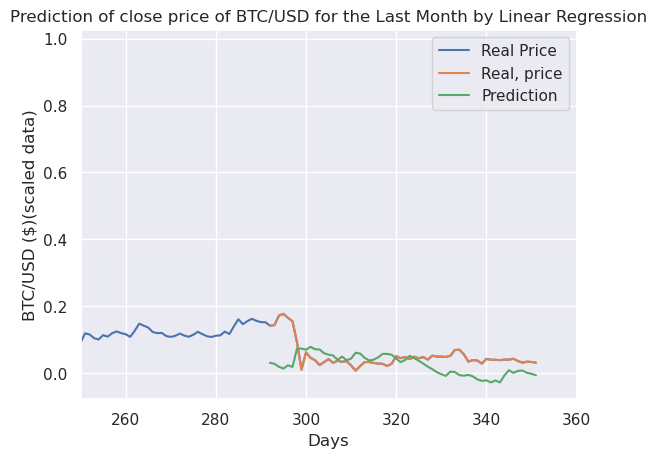

In [78]:
# Visualizing the performance of the linear regression model.
visualize_model(regression_matrix, scaled_data, zoom=[250, 360])

<font size="4">


- We can compare the $R^{2}$ of the two methods 
- Likewise, we see above that the multiple linear regression cannot predict properly the continuity of the price jsute befor day 300. Moreover the prediction diverges between $[\, 300, 340\,]$

</font>

In [79]:
# Displaying the R-squared values for both the multivariate model ('mult_r2') and the previous simple model ('simple_r2').
mult_r2, simple_r2

(0.5281489643829446, 0.43749916677520106)

<font size="4">


- The $R^{2}_{mult} > R^{2}_{simple}$, but the prediction is not better, $R^{2}$ increses just beacuse we have added regressors
- We can also plot the prediction of the first two months of 2023

</font>

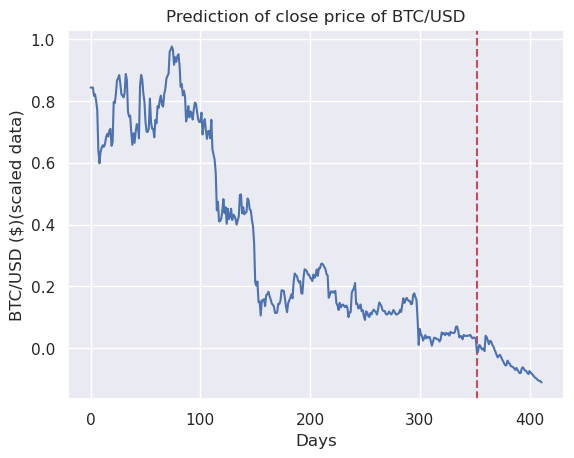

In [80]:
visualize_future(scaled_data, future_price)

<font size="4">


- We notice that the two predictions of the models are different and the multiple linear regression gives negative close price which is a problem , so the prediction diverges
- The prediction of multiple linear regression decreases rapidly, while the prediction of simple regression remains stable with fluctuations around a certain value.

#### ***Conclusion*** : 
The realized values that we plotted earlier are much more volatile, so the linear regression as we expected is not adapted to this kind of prediction. Time series are more challenging to predict so in the next part we will try another type of regression slightly more sophisticated.

</font>

# III.II ***Suport Vector Regression***
<font size="4">

- The first step is to find the best parameters of the SVR model, we proceed by Cross Validation with the function $\texttt{cross\_validation\_parameter}$

</font>

In [81]:
from sklearn.model_selection import train_test_split


In [82]:
# Creating a parameter grid for hyperparameter tuning. This grid includes a range of values for 'C' and 'gamma', which are parameters used in models like SVMs.
param_grid = {'C': [10**i for i in range(2, 11)], 
              'gamma' : [10**(-i) for i in range(2, 11)]} # Creat a dictionnary of parameters

In [83]:
# Splitting the price and target data into training and test sets, with 70% of data as training set.
price_train, _, target_train, _ = train_test_split(price, target, test_size = 0.3)
# The 'cross_validation_parameter' function is then used to find the best 'C' and 'gamma' values for a model, likely through a grid search approach.
best_C, best_gamma = cross_validation_parameter(param_grid, price_train, target_train)

In [84]:
print(f'The best values are {best_C} for C and {best_gamma} for Gamma')

The best values are 100000 for C and 0.01 for Gamma


<font size="4">

- We apply the SVR mathod with function $\texttt{apply\_svr}$

</font>


In [85]:
# Applying a Support Vector Regression (SVR) model with the best 'C' and 'gamma' values found. 
svr_matrix, future_price, accuracy_score = apply_svr(scaled_data, prediction_time, price, target, regressor, best_C, best_gamma)

<font size="4">


- We can visualize the prediction between $[\, 280, 350\, ]$ days

</font>

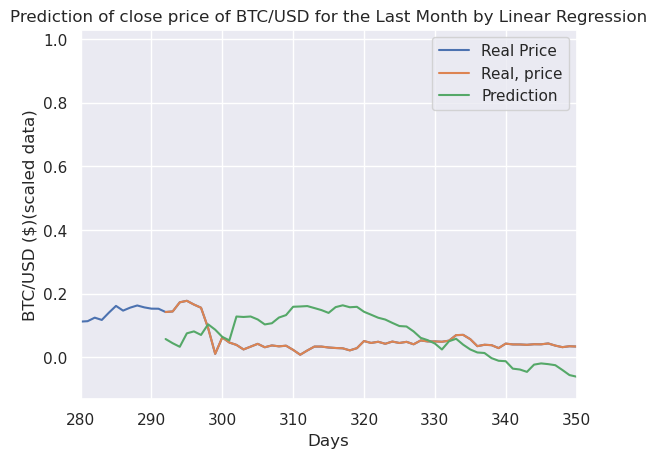

In [86]:
# Visualizing the SVR model's performance.
visualize_model(svr_matrix, scaled_data, zoom = [280, 350])

<font size="4">


- Visually it seems that the SVR model fits like the Linear Regression but it's far from what we want, peaks and drops are not dredicted, for example beteween $[\, 290, 300\, ]$ the drop is predicted earlier.

***We can check the accuracy score***

</font>

In [87]:
# Displaying the accuracy score of the SVR model.
accuracy_score

0.7051286300574904

<font size="4">


- This value is the share of the test data which are correctly predicted.
We can also show the prediction for the two first months of 2023

</font>

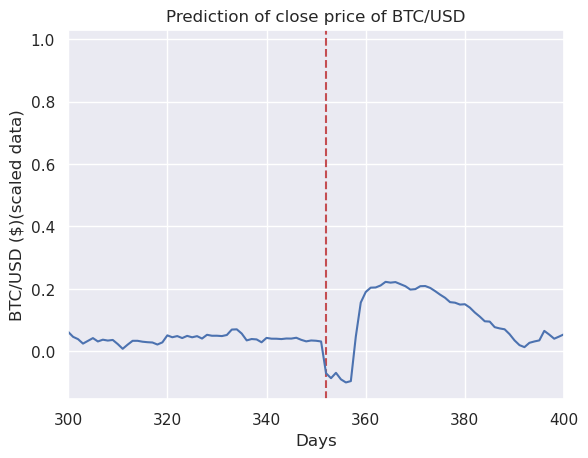

In [88]:
visualize_future(scaled_data, future_price, zoom=[300, 400])

<font size="4">

#### ***Conclusion*** : 
- The prediction diverges to negative values like the multiple linear regression but the prediction shows more valatility wich is better, the forecast trend is downward whereas the real trend is upward 
- The three method that we have presented give prediction that cannot be adapted to financial time series. We have to go in depth in specific learning models especially methods with deep learning which are more efficient

</font>


# III.III ***Long short-term memory Model*** (LSTM)
<font size="4">

- The LSTM model is a Deep Leraning model which can be used to predict time series data. LSTM networks use a memory cell with a set of gates to control the flow of information. The three main gates are the input gate, forget gate, and output gate. These gates regulate the information entering and leaving the memory cell, allowing LSTMs to selectively remember or forget information

</font>

In [89]:
# Setting the sequence length for time series prediction.
sequence_length = 20 

<font size="4">
Each value is linked to the 20th value after it the neural network learns to make predictions 
</font>

In [123]:
# Creating sequences from the scaled data using the specified sequence length.
X, y = create_sequences(scaled_data, sequence_length) # Prediction based on 20 periods (20 days or 20 hours) 
# The 'lstm_model' function trains the LSTM on these sequences and makes predictions.
y_train, y_test, predicted_values = lstm_model(X, y)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.3553
Epoch 2/100
1/1 [==============================] - 0s 99ms/step - loss: 0.2654
Epoch 3/100
1/1 [==============================] - 0s 96ms/step - loss: 0.1914
Epoch 4/100
1/1 [==============================] - 0s 92ms/step - loss: 0.1203
Epoch 5/100
1/1 [==============================] - 0s 88ms/step - loss: 0.0698
Epoch 6/100
1/1 [==============================] - 0s 79ms/step - loss: 0.0313
Epoch 7/100
1/1 [==============================] - 0s 101ms/step - loss: 0.0194
Epoch 8/100
1/1 [==============================] - 0s 94ms/step - loss: 0.0350
Epoch 9/100
1/1 [==============================] - 0s 82ms/step - loss: 0.0617
Epoch 10/100
1/1 [==============================] - 0s 82ms/step - loss: 0.0570
Epoch 11/100
1/1 [==============================] - 0s 91ms/step - loss: 0.0473
Epoch 12/100
1/1 [==============================] - 0s 75ms/step - loss: 0.0370
Epoch 13/100
1/1 [==============================] 

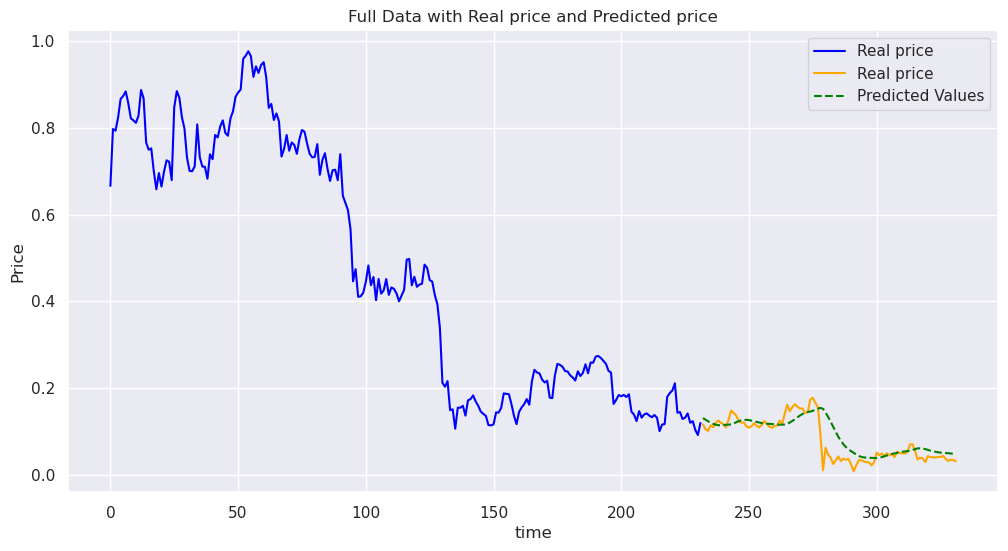

In [91]:
visualize_RNN_prediction(y_train, y_test, predicted_values)

<font size="4">
    
- The prediction fits the close price pretty well and we can notice that the prediction smooths the variation but keeps the major drops and peaks which is the most important for a trader. We can also notice that the drop arrives late because of the smoothing.

### The Next part is to use this model to have prediction hourly for day trading  
<font size="4">

- The interval we choose is ***1 hour***

In [92]:
# Re-defining the symbol, interval, and date range for loading data, this time focusing on hourly data ('1h' interval) for Bitcoin.
symbol = 'BTC/USD'
interval = '1h'
start_date = '2022-01-01 00:00:00'
end_date = '2023-03-31 00:00:00'
hour_data = load_data(symbol, start_date, end_date, interval)
hour_btc = scaling_data(hour_data)

In [93]:
# Displaying the scaled hourly Bitcoin data.
hour_btc

,datetime,open,high,low,close
0,2022-09-02 00:00:00,0.338517,0.339190,0.332757,0.334382
1,2022-09-02 01:00:00,0.334501,0.335579,0.330080,0.332241
2,2022-09-02 02:00:00,0.332274,0.334883,0.326095,0.331118
3,2022-09-02 03:00:00,0.331162,0.346200,0.331029,0.340692
4,2022-09-02 04:00:00,0.340540,0.349775,0.339578,0.341127
...,...,...,...,...,...
4995,2023-03-30 20:00:00,0.912242,0.926948,0.908161,0.926276
4996,2023-03-30 21:00:00,0.925946,0.928311,0.916700,0.922357
4997,2023-03-30 22:00:00,0.920749,0.925310,0.903158,0.907973
4998,2023-03-30 23:00:00,0.908443,0.918289,0.903705,0.917038


<font size="4">
    
- We can show the prediction on this DataSet, we expect a better prediction than the previous exemple because we provide more data

Epoch 1/100
10/10 [==============================] - 5s 114ms/step - loss: 0.0267
Epoch 2/100
10/10 [==============================] - 1s 101ms/step - loss: 0.0058
Epoch 3/100
10/10 [==============================] - 1s 107ms/step - loss: 0.0031
Epoch 4/100
10/10 [==============================] - 1s 105ms/step - loss: 0.0016
Epoch 5/100
10/10 [==============================] - 1s 92ms/step - loss: 0.0012
Epoch 6/100
10/10 [==============================] - 1s 94ms/step - loss: 0.0011
Epoch 7/100
10/10 [==============================] - 1s 90ms/step - loss: 9.5983e-04
Epoch 8/100
10/10 [==============================] - 1s 105ms/step - loss: 9.2975e-04
Epoch 9/100
10/10 [==============================] - 1s 104ms/step - loss: 9.4272e-04
Epoch 10/100
10/10 [==============================] - 1s 98ms/step - loss: 8.7131e-04
Epoch 11/100
10/10 [==============================] - 1s 108ms/step - loss: 8.7206e-04
Epoch 12/100
10/10 [==============================] - 1s 99ms/step - loss: 8.113

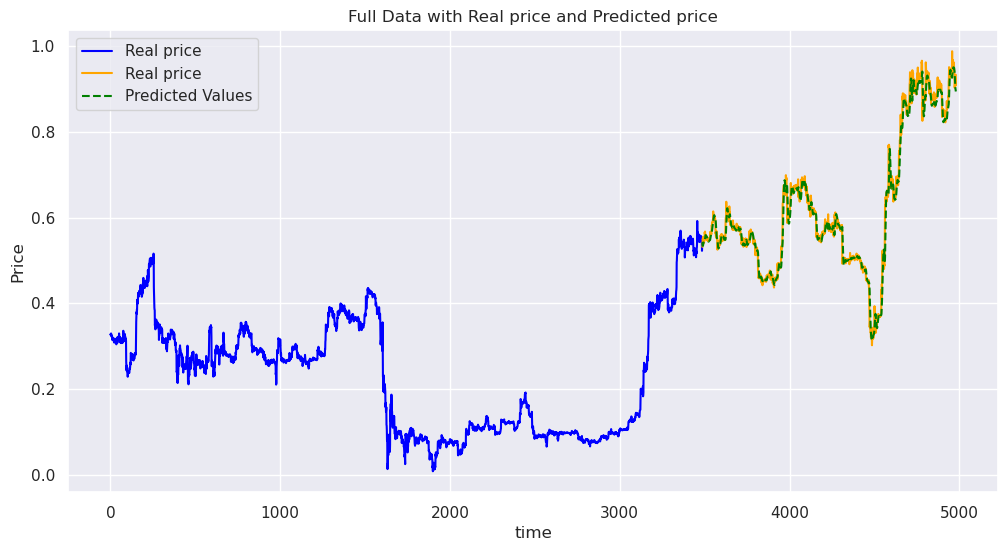

In [124]:
# Setting the sequence length for LSTM model, creating sequences from the hourly data, and applying the LSTM model to this data.
sequence_length = 20
X, y = create_sequences(hour_btc, sequence_length) # Prediction based on 20 hours 
y_train, y_test, predicted_values = lstm_model(X, y)
visualize_RNN_prediction(y_train, y_test, predicted_values)

<font size="4"> 

- As we expected the prediction match pretty well the real values

The next step is more ambitious, but it allows us to push the limits of the model. Indeed, we use LSTM for recursive prediction, meaning that we predict a value and then use it recursively to predict the next value.

- In the following example we predict the prices of the next 5 hours

</font>

In [125]:
# Implementing a recursive prediction method.
t = 5
prediction = recursive_prediction(X, y, t)

Epoch 1/100
15/15 [==============================] - 6s 102ms/step - loss: 0.0294
Epoch 2/100
15/15 [==============================] - 1s 91ms/step - loss: 0.0061
Epoch 3/100
15/15 [==============================] - 1s 90ms/step - loss: 0.0030
Epoch 4/100
15/15 [==============================] - 1s 89ms/step - loss: 0.0025
Epoch 5/100
15/15 [==============================] - 1s 85ms/step - loss: 0.0022
Epoch 6/100
15/15 [==============================] - 1s 98ms/step - loss: 0.0021
Epoch 7/100
15/15 [==============================] - 1s 84ms/step - loss: 0.0020
Epoch 8/100
15/15 [==============================] - 1s 84ms/step - loss: 0.0017
Epoch 9/100
15/15 [==============================] - 1s 86ms/step - loss: 0.0016
Epoch 10/100
15/15 [==============================] - 1s 90ms/step - loss: 0.0016
Epoch 11/100
15/15 [==============================] - 1s 79ms/step - loss: 0.0016
Epoch 12/100
15/15 [==============================] - 1s 86ms/step - loss: 0.0015
Epoch 13/100
15/15 [====

In [126]:
prediction = inverse_scalling(prediction, hour_data)

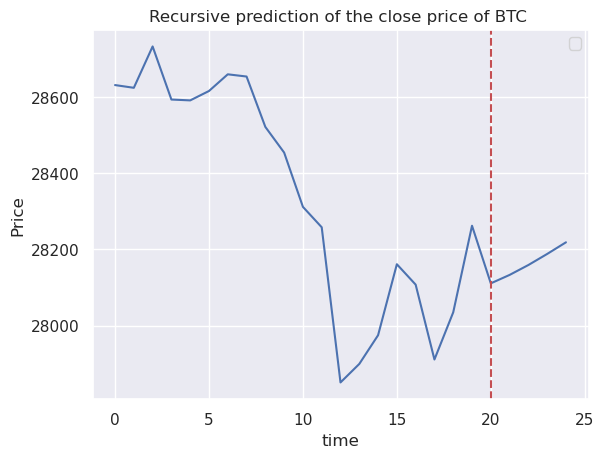

In [127]:
# Plotting the results of the recursive prediction.
# The red dashed line at 'sequence_length' indicates the point in the time series where the recursive prediction begins.
plt.plot(prediction)
plt.title('Recursive prediction of the close price of BTC ')
plt.axvline(x = sequence_length, color = 'r', linestyle = '--')
plt.xlabel('time')
plt.ylabel('Price')
plt.legend('')
plt.show()

<font size="4"> 

***Conclusion*** : 

- For recursive prediction, the model struggles to replicate the non-linear dependencies, observed in the past data, on the values predicted itself

</font>

# III.IV ***Use of time series model, Autoregressive integrated moving average model (ARIMA)***


### ***I.Introduction***

<font size="4"> 


**ARIMA** stands for **Auto-Regressive Integrated Moving Average** and is a product of two models : 

- **Auto-Regressive model (AR)** parametized by a value p, which allows to predict the future value of a time series through a regression on its last p values.

- **Moving Average model (MA)** parametized by a value q, which instead of using past forecast values uses past forecast errors in a regression-like model and aim to improve the model's forecasts by knowing how far off our prediction from yesterday was compared to the actual value. The forcasts are made based on the last q periods before the current period.


**ARIMA** model have a last parameter, the order of differenciation d, which is the number of times we must differenciate the time series to make it stationnary. **Stationnary is a must-have feature** in our time series that allows us to apply the two components (AR, MA) of the ARIMA model.


To sum up, we aim to predict the close cotation by using an **ARIMA(p,d,q)** model. From now on, we focus on the determination of the parameters **p,d,q**.

</font>

### **II-Loading and visualizing the data**

<font size="4"> 

We use the API to load the data. We focus on the bitcoin daily cotations in USD between 2021 and 2022


In [148]:
symbol = 'BTC/USD'
interval = '1day'
start_date = '2021-01-01 00:00:00'
end_date = '2022-12-31 00:00:00'

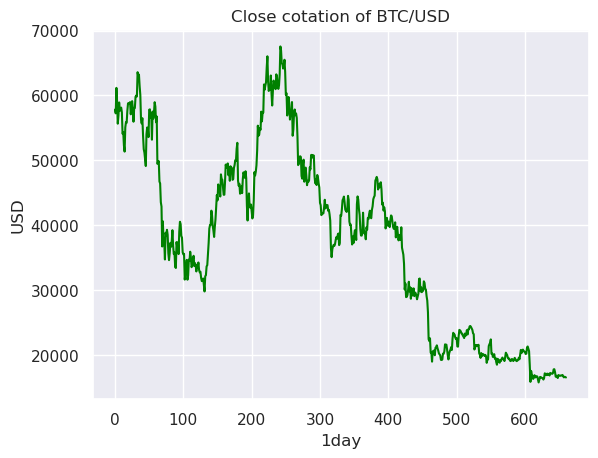

In [149]:
data = load_data(symbol, start_date, end_date, interval)

data.head(n = 10)

visualize_data(data, symbol, interval)

<font size="4">

- The previous plot showed a great volatility in the price. Let's plot the price along with its moving statistic. A stationnary time series is expected to have these features constant in time.


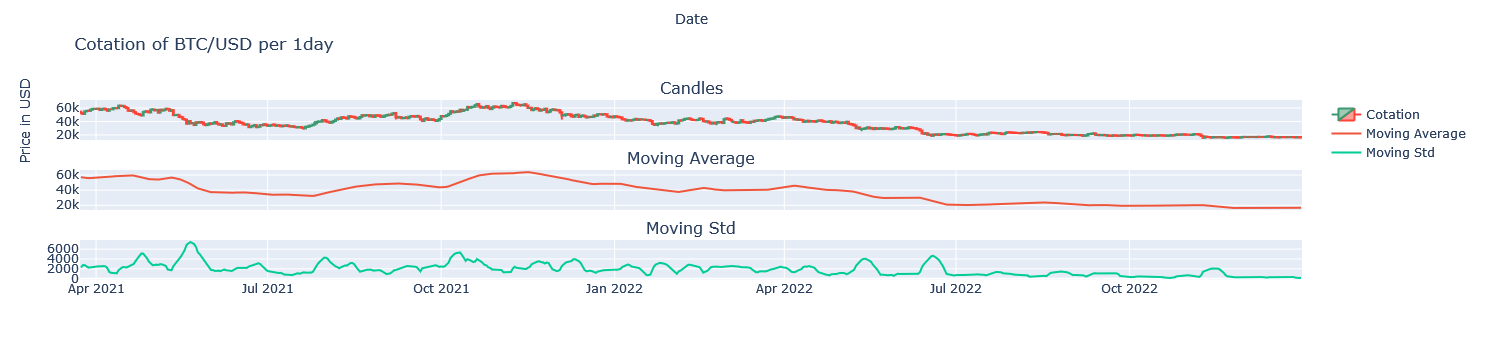

In [150]:
data = add_arima_indicators(data, "close", period = 14) 

arima_viz_with_indicator(data,symbol, interval)

<font size="4">

- As we can see, there is no real stationnarity in this time series.

Let's apply logarithmic transformation to the data in order to reduce the variation strength.

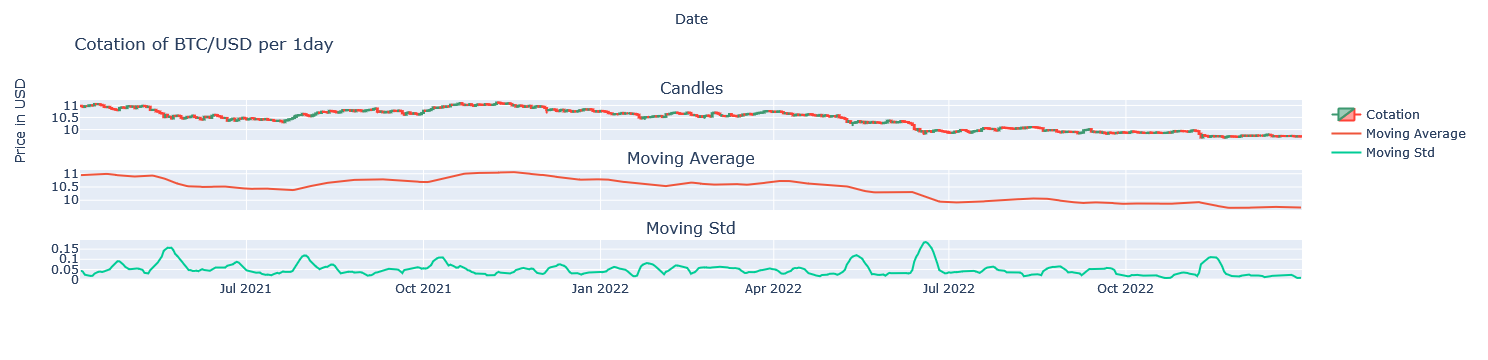

In [151]:
log_data = add_arima_indicators(data, "close", period = 14, ln = True) 

arima_viz_with_indicator(log_data, symbol, interval)

<font size="4">

- The amplitude of the variations are well-reduced as we can see on the axis 

### **III-Stationnarity test**

<font size="4">

We observed a downward trend and a non-constant variance in the previous plots. Our series is far from stationnary

Two tests can help us confirm wether the series is stationnary or not :

- The **Augmented Dicky Fuller Test (ADF Test)** : H0 = The series is non-stationary. The more negative the ADF number is, the more prominent the rejection of the null hypothesis that the time series is non-stationary.

- The **Kwiatkowski–Phillips–Schmidt–Shin (KPSS)**: H0 = The series is stationary. The higher the test statistic, the more prominent the rejection of the null hypothesis that the series is stationary.


Let's perform an example on the original series.

In [152]:
adf_test(data, "close")
kpss_test(data, 'close')

ADF statistic : -0.675471
p-value : 0.853001
Results of KPSS Test:
Test Statistic    0.607111
p-value           0.010000
dtype: float64


/home/onyxia/work/Crypto_project/crypto_module.py:574: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [153]:
adf_test(log_data, "close")
kpss_test(log_data, "close")

ADF statistic : -0.835036
p-value : 0.808613
Results of KPSS Test:
Test Statistic    0.606534
p-value           0.010000
dtype: float64


/home/onyxia/work/Crypto_project/crypto_module.py:574: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




<font size="4">

***Conclusion*** : 

The ADF test failed to reject the null hypothesis while the KPSS rejects its null hypothesis with a very small p-value in both cases, we reject at the level of 1%. It firmly confirms the non-stationnarity of the time series or its log.

Since the ADF gave better results in the log case, we will keep the log series from now on in our analysis.

### **IV-Differenciation order**
<font size="4">


To calibrate our ARIMA model and achieve stationnarity we will need to differenciate our data at least once.

To do so, we differenciate the data d times and run the ADF and KPSS test until we obtain p-values respectively lower and higher than 5% so that we can assume stationnarity.

In [154]:
d, diff_data = find_diff_order(log_data, "close", to_print= False)


/home/onyxia/work/Crypto_project/crypto_module.py:574: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




<font size="4">


As the result showed a **first-order** differenciation results in success for both ADF and KPSS test. 

We got our first parameter, **d = 1** with the function we implemented.

We can look how the data behave after the first order differenciation

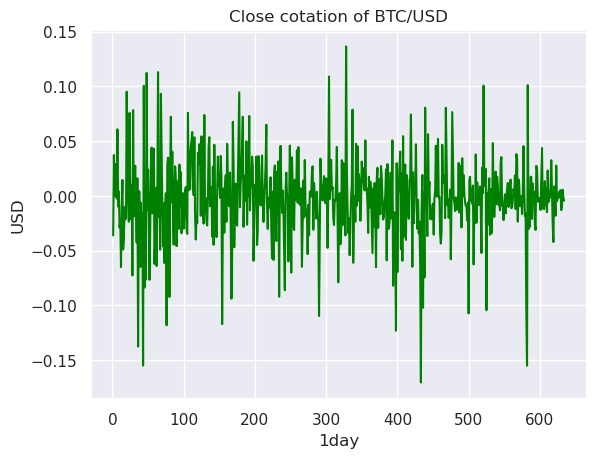

The order of differenciation is 1


In [155]:
visualize_data(diff_data, symbol, interval)
print(f"The order of differenciation is {d}")

<font size="4">


***The important conclusion is it looks far more stationnary than the original series.***

### **V-Auto-Regression and Moving Average parameters**

<font size="4">


In this part we aim at compute the p and q parameters of our ARIMA model. 

For this sake, we might plot the **Auto Correlation Function (ACF)** and **Partial Auto Correlation Function (PACF)** plot functions. 

- **ACF** plot displays the correlation coefficients between a time series and its lag values. It explains how the present value of a given time series is related to previous values. 
- **PACF** correlates the impact on n(k) of n(k-3) that are not predicted by n(k-1) and n(k-2). 

We look for significant points outside the shaded area and a geometric decay if we are dealing with a times series where ARIMA may be appropriate.


#### **01- ACF and PACF plots**

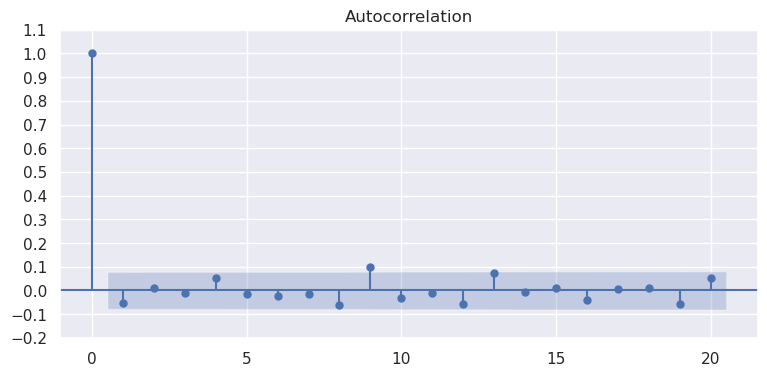

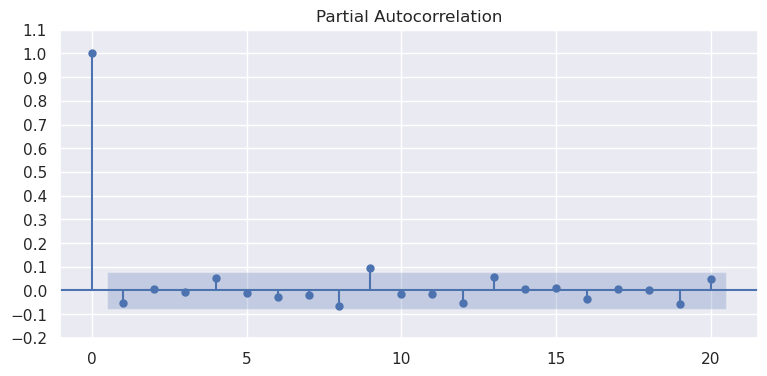

In [156]:
acf_pacf(diff_data, 'close')

<font size="4">


The ACF and PACF plots, shows some significant points (ninth lag for example), but no geometric decay.

What we are seeing is likely an ARIMA(0, 1, 0) model, meaning our differenced data will be what is known as **“white noise”** and  our original data a **“random walk”** and therefore the best prediction we can do of the current is by using the precedent value.

Before moving forward, we need to check those hypothesis.

#### **02- Is our data a white noise ?**

<font size="4">


If the variables are independent and identically distributed with a mean of zero, the time series is white noise. Let's check this possibility.

We'll proceed in two steps :

- Splitting the dataset in two parts and observe the distributions
- Compute the Ljung-box test for which H0 = Data is independently distributed.

##### **02a- SPLITTING THE DATA**

count    317.000000
mean      -0.001129
std        0.039481
min       -0.155023
25%       -0.022246
50%       -0.000083
75%        0.021202
max        0.112952
Name: close, dtype: float64
count    317.000000
mean      -0.002832
std        0.033927
min       -0.170430
25%       -0.016660
50%       -0.002103
75%        0.013394
max        0.136430
Name: close, dtype: float64


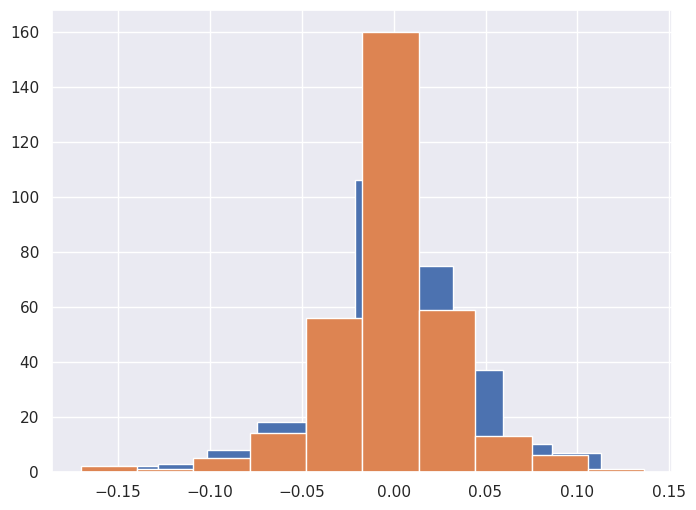

In [157]:
fast_dist_check(diff_data, 'close')

<font size="4">


***Problem*** : As we can see the distribution varies is quite similar in the samples. We can not rule out the hypothesis of our differenced data to be white noise.

Now we are performing the Ljung-box test

##### **02b- COMPUTING LJUNG-BOX TEST**

In [158]:
LB_test(diff_data, 'close')

,lb_stat,lb_pvalue
20,24.712727,0.212643


<font size="4">

***Conclusion*** : The Ljung-box test fails to reject the null hypothesis because the ***p-value*** is equal to 21% which is very large

#### **03- Using Auto-ARIMA**
<font size="4">


The function called “Auto-Arima” from the pmdarima package fit and test a selection of models and return the model with the lowest **Akaike Information Criterion (AIC)** value. 

In [159]:
auto_arima(data, "close")

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-2433.057, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2440.491, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2440.369, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2440.342, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2440.962, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2438.405, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.979 seconds


((0, 1, 0),
 0           NaN
 1     -0.018070
 2      0.070255
 3      0.014309
 4     -0.001622
          ...   
 643   -0.013043
 644   -0.009603
 645    0.005595
 646   -0.001757
 647   -0.004466
 Name: close, Length: 648, dtype: float64,
 0      10.864428
 1      -0.018070
 2       0.070255
 3       0.014309
 4      -0.001622
          ...    
 643    -0.013043
 644    -0.009603
 645     0.005595
 646    -0.001757
 647    -0.004466
 Length: 648, dtype: float64)

<font size="4">


The Auto-arima process states the best fit for the data is an ARIMA(). It's the same results for every information criterion we can use in the process (hqic, bic, oob..). It reinforces the idea of our differenced data being white noise.

### **VI- FORECASTING FUTURE VALUES**

<font size="4">


Since we obtained significant correlation for the ninth lag value, we will still try to predict future values with an auto-regression order and moving average of 10. Let's the results ! 

/opt/mamba/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/onyxia/work/Crypto_project/crypto_module.py:738: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



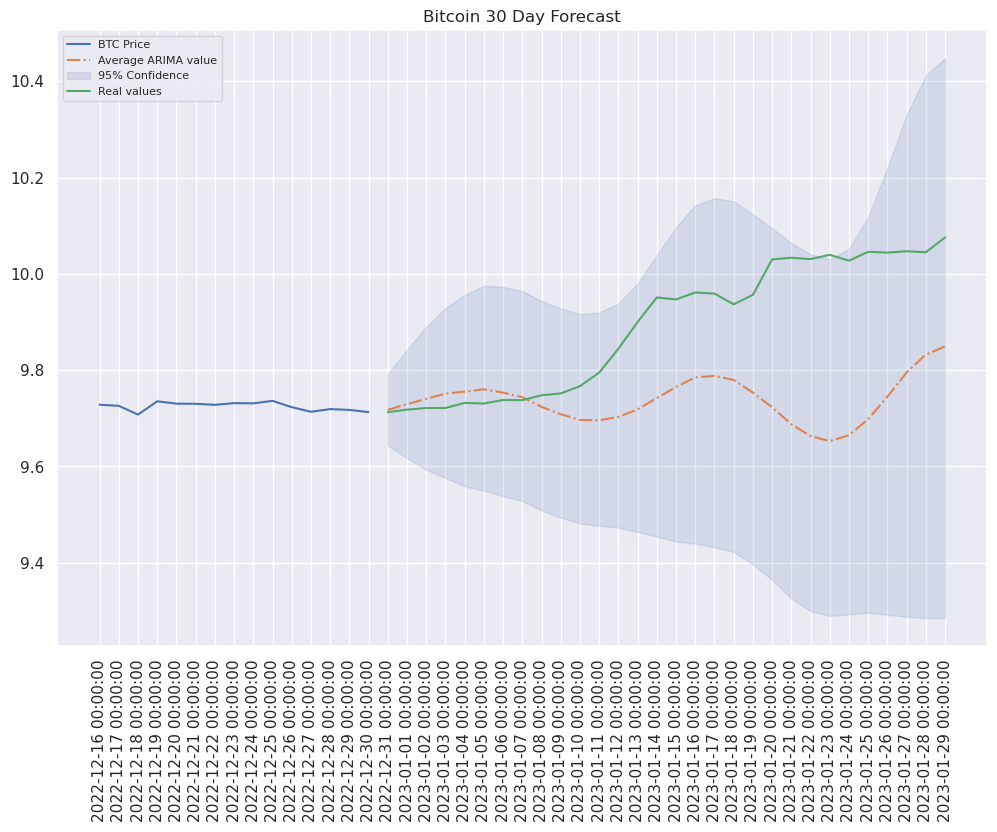

In [160]:
model(data, "close",30, end_date, symbol,interval, 10,1,10)

### **VII-Conclusion on the ARIMA model**
<font size="4">



We clearly see at sight the inefficiency of the forecasting renforcing the idea that the price is more likely to be a random walk highly difficul to predict.

The models fails to reproduce the sudden jumps of the price that we can observe in reality, like the LSTM model the prediction smooths the fluctuation.